# Analyzing journalists killed from 1993 to 2022

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import re

In [7]:
df = pd.read_csv("Killed_journalists.csv")

In [8]:
df.head()

,Name,Gender,Date killed,Nationality,Judicial enquiry status,Country in which killed,DG condemnation,Member State response *
0,John Wesley Amady,Male,06/01/2022,Haitian,New request,Haiti,Link,NaN
1,Muratkhan Bazarbayev,Male,06/01/2022,NaN,New request,Kazakhstan,Link,NaN
2,Wilguens Louissaint,Male,06/01/2022,Haitian,New request,Haiti,Link,NaN
3,Sai Win Aung,Male,25/12/2021,Burmese,New request,Myanmar,Link,NaN
4,Soe Naing,Male,14/12/2021,Burmese,New request,Myanmar,Link,NaN


### Read the Information Below to understand the process I employed the get the data

In [ ]:
# The data used for this analysis was scrapped from the UNESCO Website https://en.unesco.org/themes/safety-journalists/observatory.
# It the government released number of journalists that have been killed in the course of their duties in various countries
# and various times.

# A part of the reason for this is to deepen my konwledge of scraping data from websites. I have to indicate that I tried to scrape
# the data with a single unified code but encountered server errors on dely to respond. I still want to learn so when you read this
# and find a way around, reach out to me. I will share the code I used to scrape below while the one that failed will be shared
# down after the multiples onces that worked. The data was paginated. It has a total of 51 pages as at the time of this analysis
# 13/05/2022. I continued to change the url below in the load process to as to extract each page.


# import re
# import requests
# from bs4 import BeautifulSoup as bs
# r = requests.get('https://en.unesco.org/themes/safety-journalists/observatory?field_journalists_date_killed_value%5Bmax%5D%5Byear%5D=&field_journalists_date_killed_value%5Bmin%5D%5Byear%5D=&field_journalists_gender_value_i18n=All&field_journalists_judicial_tid=All&field_journalists_local_value_i18n=All&field_journalists_nationality_tid_i18n=All&field_journalists_status_value_i18n=All&field_journalists_type_of_media_tid_i18n=All&field_unesco_region_value_i18n=All&page=50')
# unesdata = bs(r.content)
# print(unesdata.prettify())

# table = unesdata.find_all('table')
# unes1 = pd.read_html(str(table))[0]
# unes1.head(2)

# table = unesdata.find_all('table')
# unes2 = pd.read_html(str(table))[0]
# unes2.head(2)

# table = unesdata.find_all('table')
# unes3 = pd.read_html(str(table))[0]
# unes3.head(2)

# table = unesdata.find_all('table')
# unes4 = pd.read_html(str(table))[0]
# unes4.head(2)

# table = unesdata.find_all('table')
# unes5 = pd.read_html(str(table))[0]
# unes5.head(2)

# table = unesdata.find_all('table')
# unes6 = pd.read_html(str(table))[0]
# unes6.head(2)

# table = unesdata.find_all('table')
# unes7 = pd.read_html(str(table))[0]
# unes7.head(2)

# table = unesdata.find_all('table')
# unes8 = pd.read_html(str(table))[0]
# unes8.head(2)

# table = unesdata.find_all('table')
# unes9 = pd.read_html(str(table))[0]
# unes9.head(2)

# table = unesdata.find_all('table')
# unes10 = pd.read_html(str(table))[0]
# unes10.head(2)

# table = unesdata.find_all('table')
# unes11 = pd.read_html(str(table))[0]
# unes11.head(2)

# table = unesdata.find_all('table')
# unes12 = pd.read_html(str(table))[0]
# unes12.head(2)

# table = unesdata.find_all('table')
# unes13 = pd.read_html(str(table))[0]
# unes13.head(2)

# table = unesdata.find_all('table')
# unes14 = pd.read_html(str(table))[0]
# unes14.head(2)

# table = unesdata.find_all('table')
# unes15 = pd.read_html(str(table))[0]
# unes15.head(2)

# table = unesdata.find_all('table')
# unes16 = pd.read_html(str(table))[0]
# unes16.head(2)

# table = unesdata.find_all('table')
# unes17 = pd.read_html(str(table))[0]
# unes17.head(2)

# table = unesdata.find_all('table')
# unes18 = pd.read_html(str(table))[0]
# unes18.head(2)

# table = unesdata.find_all('table')
# unes19 = pd.read_html(str(table))[0]
# unes19.head(2)

# table = unesdata.find_all('table')
# unes20 = pd.read_html(str(table))[0]
# unes20.head(2)

# table = unesdata.find_all('table')
# unes21 = pd.read_html(str(table))[0]
# unes21.head(2)

# table = unesdata.find_all('table')
# unes22 = pd.read_html(str(table))[0]
# unes22.head(2)

# table = unesdata.find_all('table')
# unes23 = pd.read_html(str(table))[0]
# unes23.head(2)

# table = unesdata.find_all('table')
# unes24 = pd.read_html(str(table))[0]
# unes24.head(2)

# table = unesdata.find_all('table')
# unes25 = pd.read_html(str(table))[0]
# unes25.head(2)

# table = unesdata.find_all('table')
# unes26 = pd.read_html(str(table))[0]
# unes26.head(2)

# table = unesdata.find_all('table')
# unes27 = pd.read_html(str(table))[0]
# unes27.head(2)

# table = unesdata.find_all('table')
# unes28 = pd.read_html(str(table))[0]
# unes28.head(2)

# table = unesdata.find_all('table')
# unes29 = pd.read_html(str(table))[0]
# unes29.head(2)

# table = unesdata.find_all('table')
# unes30 = pd.read_html(str(table))[0]
# unes30.head(2)

# table = unesdata.find_all('table')
# unes31 = pd.read_html(str(table))[0]
# unes31.head(2)

# table = unesdata.find_all('table')
# unes32 = pd.read_html(str(table))[0]
# unes32.head(2)

# table = unesdata.find_all('table')
# unes33 = pd.read_html(str(table))[0]
# unes33.head(2)

# table = unesdata.find_all('table')
# unes34 = pd.read_html(str(table))[0]
# unes34.head(2)

# table = unesdata.find_all('table')
# unes35 = pd.read_html(str(table))[0]
# unes35.head(2)

# table = unesdata.find_all('table')
# unes36 = pd.read_html(str(table))[0]
# unes36.head(2)

# table = unesdata.find_all('table')
# unes37 = pd.read_html(str(table))[0]
# unes37.head(2)

# table = unesdata.find_all('table')
# unes38 = pd.read_html(str(table))[0]
# unes38.head(2)

# table = unesdata.find_all('table')
# unes39 = pd.read_html(str(table))[0]
# unes39.head(2)

# table = unesdata.find_all('table')
# unes40 = pd.read_html(str(table))[0]
# unes40.head(2)

# table = unesdata.find_all('table')
# unes41 = pd.read_html(str(table))[0]
# unes41.head(2)

# table = unesdata.find_all('table')
# unes42 = pd.read_html(str(table))[0]
# unes42.head(2)

# table = unesdata.find_all('table')
# unes43 = pd.read_html(str(table))[0]
# unes43.head(2)

# table = unesdata.find_all('table')
# unes44 = pd.read_html(str(table))[0]
# unes44.head(2)

# table = unesdata.find_all('table')
# unes45 = pd.read_html(str(table))[0]
# unes45.head(2)

# table = unesdata.find_all('table')
# unes46 = pd.read_html(str(table))[0]
# unes46.head(2)

# table = unesdata.find_all('table')
# unes47 = pd.read_html(str(table))[0]
# unes47.head(2)

# table = unesdata.find_all('table')
# unes48 = pd.read_html(str(table))[0]
# unes48.head(2)

# table = unesdata.find_all('table')
# unes49 = pd.read_html(str(table))[0]
# unes49.head(2)

# table = unesdata.find_all('table')
# unes50 = pd.read_html(str(table))[0]
# unes50.head(2)



# unesco_concat1 = pd.concat([unes49, unes50], axis=0)
# unesco_concat1.head()

# unesco_concat1.shape

# unesco_concat2 = pd.concat([unes1, unes2, unes3, unes4, unes5, unes6, unes7, unes8, unes9, unes10, unes11, unes12, unes13, unes14, unes15, unes16, unes17, unes18, unes19, unes20, unes21, unes22, unes23, unes24, unes25, unes26, unes27, unes28, unes29, unes29, unes30, unes31, unes32, unes33, unes34, unes35, unes36, unes37, unes38, unes39, unes40, unes41, unes42, unes43, unes44, unes45, unes46, unes47, unes48], axis=0)
# unesco_concat2.head()

# unescojodata = pd.concat([unesco_concat2, unesco_concat1])
# unescojodata.info()

The code I tried but failed:
# #Generated an error. Do not run!!!
# import urllib
# import urllib.request
# from bs4 import BeautifulSoup
# import os


# def make_soup(url):
#     thepage=urllib.request.urlopen(url)
#     soupdata=BeautifulSoup(thepage,"html.parser")
#     return soupdata


# save=""
# for num in range(0, 49):
#     soup=make_soup("https://en.unesco.org/themes/safety-journalists/observatory?field_journalists_date_killed_value%5Bmax%5D%5Byear%5D=&field_journalists_date_killed_value%5Bmin%5D%5Byear%5D=&field_journalists_gender_value_i18n=All&field_journalists_judicial_tid=All&field_journalists_local_value_i18n=All&field_journalists_nationality_tid_i18n=All&field_journalists_status_value_i18n=All&field_journalists_type_of_media_tid_i18n=All&field_unesco_region_value_i18n=All"+str(num))
#     for rec in soup.find_all('tr'):
#         saverec=""
#         for data in rec.find_all('td'):
#             data = data.text.strip()
#             if "," in data:
#                 data = data.replace(",", "")
#             saverec=saverec+","+data
#         if len(saverec)!=0:
#          save=save+"\n"+saverec[1:]
#     print('#%d done' % num)

# headers="Name","Gender","Date killed","Nationality","Judicial enquiry status","DG condemnation","Member State response *"
# with open(os.path.expanduser("Killed_journalists.csv"), "w") as csv_file:
#     csv_file.write(headers)
#     csv_file.write(save)
    
    
As well as:
# import requests, csv
# from bs4 import BeautifulSoup

# url = "https://en.unesco.org/themes/safety-journalists/observatory?field_journalists_date_killed_value%5Bmax%5D%5Byear%5D=&field_journalists_date_killed_value%5Bmin%5D%5Byear%5D=&field_journalists_gender_value_i18n=All&field_journalists_judicial_tid=All&field_journalists_local_value_i18n=All&field_journalists_nationality_tid_i18n=All&field_journalists_status_value_i18n=All&field_journalists_type_of_media_tid_i18n=All&field_unesco_region_value_i18n=All"

# with open('Killed_journalists.csv', "w", encoding="utf-8") as f:
#     writer = csv.writer(f)
#     writer.writerow(["Name","Gender","Date killed","Nationality","Judicial enquiry status","DG condemnation","Member State response *"])

#     while True:
#         html = requests.get(url)
#         soup = BeautifulSoup(html.text, 'html.parser')
#         for row in soup.select('table tbody tr'):
#             writer.writerow([c.text if c.text else '' for c in row.select('td')])


#         if soup.select_one('li.active + li a'):
#             url = soup.select_one('li.active + li a')['href']
#         else:
#             break

In [11]:
df.head()

,Name,Gender,Date killed,Nationality,Judicial enquiry status,Country in which killed,DG condemnation,Member State response *
0,John Wesley Amady,Male,06/01/2022,Haitian,New request,Haiti,Link,NaN
1,Muratkhan Bazarbayev,Male,06/01/2022,NaN,New request,Kazakhstan,Link,NaN
2,Wilguens Louissaint,Male,06/01/2022,Haitian,New request,Haiti,Link,NaN
3,Sai Win Aung,Male,25/12/2021,Burmese,New request,Myanmar,Link,NaN
4,Soe Naing,Male,14/12/2021,Burmese,New request,Myanmar,Link,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     1516 non-null   object
 1   Gender                   1516 non-null   object
 2   Date killed              1516 non-null   object
 3   Nationality              1513 non-null   object
 4   Judicial enquiry status  1348 non-null   object
 5   Country in which killed  1516 non-null   object
 6   DG condemnation          1509 non-null   object
 7   Member State response *  733 non-null    object
dtypes: object(8)
memory usage: 94.9+ KB


In [13]:
df.isna().sum()

Name                         0
Gender                       0
Date killed                  0
Nationality                  3
Judicial enquiry status    168
Country in which killed      0
DG condemnation              7
Member State response *    783
dtype: int64

In [ ]:
data['Native Country'].fillna(data['Native Country'].mode()[0], inplace=True)

In [18]:
df['Nationality'].fillna(df['Nationality'].mode()[0], inplace = True)
df['Judicial enquiry status'].fillna(df['Judicial enquiry status'].mode()[0], inplace = True)

In [22]:
df.drop(columns = ['DG condemnation','Member State response *'], axis = 1, inplace = True)

In [26]:
df['Date killed'] = pd.to_datetime(df['Date killed'])

In [45]:
df.head(3)

,Name,Gender,Date killed,Nationality,Judicial enquiry status,Country in which killed,Month Killed,Year Killed
0,John Wesley Amady,Male,2022-06-01,Haitian,New request,Haiti,June,2022
1,Muratkhan Bazarbayev,Male,2022-06-01,Iraqi,New request,Kazakhstan,June,2022
2,Wilguens Louissaint,Male,2022-06-01,Haitian,New request,Haiti,June,2022


In [42]:
df['Month Killed'] = pd.DatetimeIndex(df['Date killed']).month
df['Year Killed'] = pd.DatetimeIndex(df['Date killed']).year

In [44]:
df['Month Killed'].replace({1:'January', 2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}, inplace = True)

In [47]:
df['Year Killed'].min()

1993

In [48]:
df['Year Killed'].max()

2022

In [56]:
#Counting the number of journalists killed from 1993 to 2022 May.
count_of_people_killed  = df['Name'].count()
print(f"The Number of journalists killed according to governments record is: {count_of_people_killed}")

The Number of journalists killed according to governments record is: 1516


In [60]:
df.pivot_table(index = 'Year Killed', values = 'Name', aggfunc = 'count').sort_values(by = 'Name', ascending = False)

,Name
Year Killed,
2012,154
2015,116
2016,102
2018,99
2014,99
2013,90
2006,84
2021,82
2017,80


<AxesSubplot:xlabel='Year Killed', ylabel='count'>

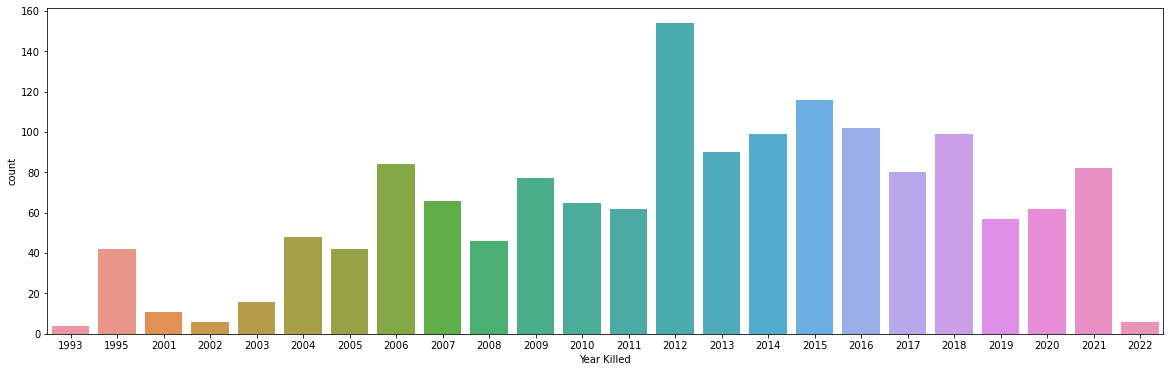

In [76]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'Year Killed', data = df)

In [63]:
df['Gender'].value_counts(normalize = True)

Male      0.925462
Female    0.074538
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

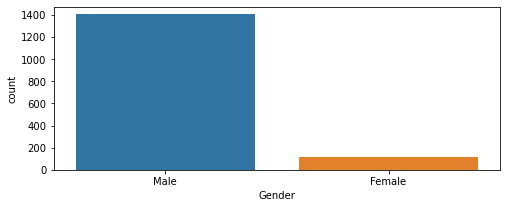

In [81]:
plt.figure(figsize=(8,3))
sns.countplot(x = 'Gender', data = df)

In [66]:
df['Month Killed'].value_counts(normalize = True)

May          0.100264
November     0.095646
October      0.095646
July         0.091689
June         0.090369
August       0.083773
January      0.081794
April        0.077177
September    0.075198
December     0.070580
February     0.070580
March        0.067282
Name: Month Killed, dtype: float64

<AxesSubplot:xlabel='Month Killed', ylabel='count'>

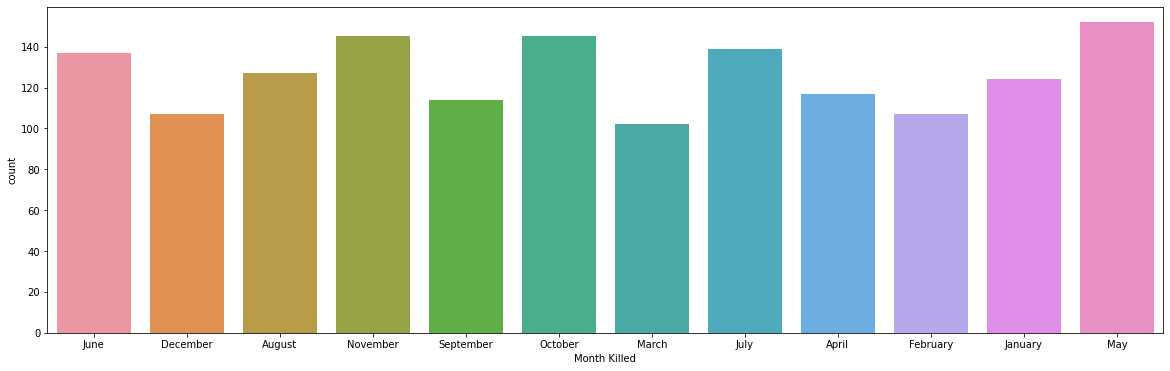

In [82]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'Month Killed', data = df)

In [69]:
#Top 10 Nationalities killed
df['Nationality'].value_counts(normalize = True)[:10]

Iraqi        0.129947
Mexican      0.089710
Syrian       0.075198
Filipino     0.073879
Pakistani    0.058707
Somali       0.050132
Afghan       0.047493
Indian       0.038918
Brazilian    0.033641
Honduran     0.032322
Name: Nationality, dtype: float64

In [123]:
df1 = df[['Nationality']].value_counts()[:10]

In [126]:
#Creating a new dataframe for the top 10 Nationality most killed
df1 = pd.DataFrame(df1)

In [127]:
df1

,0
Nationality,
Iraqi,197
Mexican,136
Syrian,114
Filipino,112
Pakistani,89
Somali,76
Afghan,72
Indian,59
Brazilian,51


In [70]:
df['Country in which killed'].value_counts(normalize = True)[:10]

Iraq                    0.133245
Mexico                  0.091029
Syrian Arab Republic    0.083113
Philippines             0.073879
Pakistan                0.060026
Afghanistan             0.054090
Somalia                 0.051451
India                   0.037599
Brazil                  0.033641
Honduras                0.031662
Name: Country in which killed, dtype: float64

<AxesSubplot:xlabel='Country in which killed', ylabel='count'>

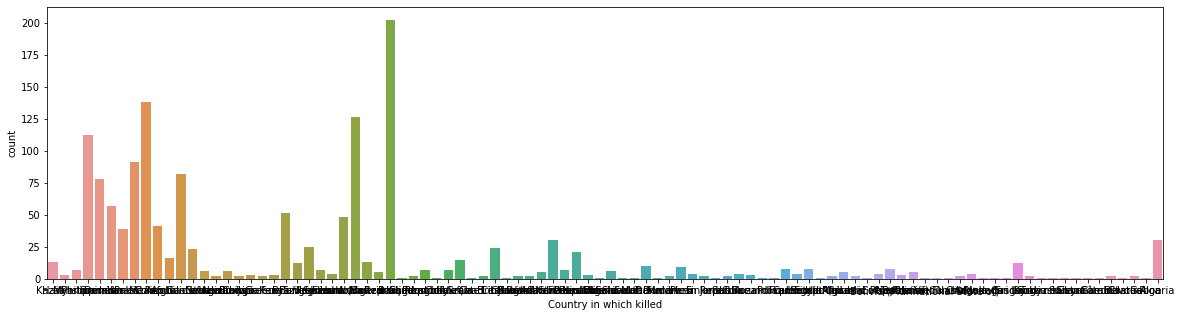

In [130]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'Country in which killed', data = df)

In [72]:
df['Judicial enquiry status'].value_counts(normalize = True)

Ongoing/Unresolved                                                                                        0.556728
No Information Received So Far                                                                            0.246702
Resolved                                                                                                  0.108839
New request                                                                                               0.058047
Unresolved – Archived                                                                                     0.015172
Ongoing/Unresolved – Reported by Member State as killed by foreign actors beyond national jurisdiction    0.014512
Name: Judicial enquiry status, dtype: float64

<AxesSubplot:xlabel='Judicial enquiry status', ylabel='count'>

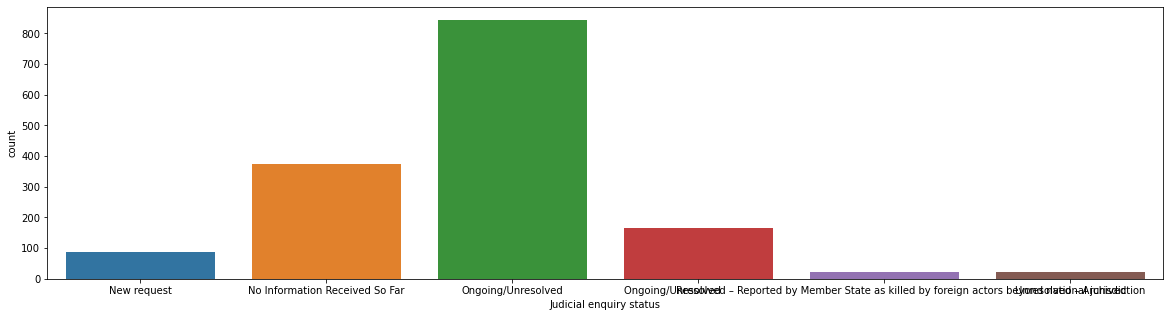

In [132]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'Judicial enquiry status', data = df)